In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from py_pol import degrees, np
from py_pol.stokes import Stokes, create_Stokes
from py_pol.jones_vector import Jones_vector

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Create arrays

In [33]:
# Create several objectsat once
print(create_Stokes(['E1', 'E2', 'E3']))

print(create_Stokes(['E1']))

print(create_Stokes('E1', N=3))

E1, E2, E3 = create_Stokes(['E1', 'E2', 'E3'])
print(E1, E2, E3)

[E1 is empty
, E2 is empty
, E3 is empty
]
E1 is empty

[E1 is empty
, E1 is empty
, E1 is empty
]
E1 is empty
 E2 is empty
 E3 is empty



In [34]:
# From_matrix
M = [[1, 0.5, 0],
    [0, 0.5, 2],
    [1, 0.5, 0],
    [1, 0.5, 0]]
E = Stokes()
E.from_matrix(M)
print(E)


M = [[1, 0.5, 1, 1],
    [0, 0.5, 2, 2],
    [2, 2, 3, 4]]
E.from_matrix(M)
print(E)
# print(E.M)

M = [1, 0, 1, 2]
E.from_matrix(M)
print(E)
# print(E.M)

M = [[[1, 2, 2.5, 1], [3, 4, 4.5, 1]],
    [[5, 6, 6.5, 1], [7, 8, 8.5, 1]]]
E.from_matrix(M)
print(E)

S = 
[+1.000]   [+0.500]   [+0.000]   
[+0.000]   [+0.500]   [+2.000]   
[+1.000]   [+0.500]   [+0.000]   
[+1.000]   [+0.500]   [+0.000]   

S = 
[+1.000]   [+0.000]   [+2.000]   
[+0.500]   [+0.500]   [+2.000]   
[+1.000]   [+2.000]   [+3.000]   
[+1.000]   [+2.000]   [+4.000]   

S = 
[+1.000]   
[+0.000]   
[+1.000]   
[+2.000]   

S S0 = 
[[1. 3.]
 [5. 7.]]
S S1 = 
[[2. 4.]
 [6. 8.]]
S S2 = 
[[2.5 4.5]
 [6.5 8.5]]
S S3 = 
[[1. 1.]
 [1. 1.]]



## Operations

### Sum

In [35]:
# Stokes + Stokes
S1, S2 = create_Stokes(('S1', 'S2'))
M1 = np.array([1, 1, 0, 0])
M2 = np.array([1, 0, 1, 0])
S1.from_matrix(M1)
S2.from_matrix(M2)
print(S1+S2)

M2 = np.array([[1, 0, 1, 0], [1, 0, 0, 1]])
S2.from_matrix(M2)
print(S1+S2)

M1 = np.array([[2, 1, 1, 0], [2, 0, 0, 1]])
S1.from_matrix(M1)
print(S1+S2)

S1, S2 = create_Stokes(('S1', 'S2'))
M1 = np.array([1, 1, 0, 0])
M2 = np.array([1, 0, 0, 1])
S1.from_matrix(M1)
S2.from_matrix(M2)
print(S1+S2)
S1.set_global_phase(0*degrees)
S2.set_global_phase(90*degrees)
print(S1+S2)

S1 + S2 = 
[+2.000]   
[+1.000]   
[+1.000]   
[+0.000]   

S1 + S2 = 
[+2.000]   [+2.000]   
[+1.000]   [+1.000]   
[+1.000]   [+0.000]   
[+0.000]   [+1.000]   

S1 + S2 = 
[+3.000]   [+3.000]   
[+1.000]   [+0.000]   
[+2.000]   [+0.000]   
[+0.000]   [+2.000]   

S1 + S2 = 
[+2.000]   
[+1.000]   
[+0.000]   
[+1.000]   

S1 + S2 = 
[+3.414]   
[+2.414]   
[+0.000]   
[+2.414]   



In [36]:
# Stokes + Jones
S1 = Stokes('S1 incoherent')
M1 = np.array([1, 1, 0, 0])
S1.from_matrix(M1)
E1 = Jones_vector()
M2 = np.array([[0], [1]])
E1.from_matrix(M2)
print(S1+E1)
S1.name = 'S1 coherent'
S1.global_phase = 0
print(S1+E1)


S1 = Stokes('S1 incoherent')
M1 = np.array([[1, 0, 1, 0], [1, 1, 0, 0]])
S1.from_matrix(M1)
E1 = Jones_vector()
M2 = np.array([[1], [1j]])
E1.from_matrix(M2)
print(S1+E1)
S1.name = 'S1 coherent'
S1.global_phase = 0
print(S1+E1)

S1 = Stokes('S1 incoherent')
M1 = np.array([[1, 0, 1, 0], [1, 1, 0, 0]])
S1.from_matrix(M1)
E1 = Jones_vector()
M2 = np.array([[1], [1j]])
E1.from_matrix(M2)
print(S1-E1)
S1.name = 'S1 coherent'
S1.global_phase = 0
print(S1+E1)


S1 incoherent + E = 
[+2.000]   
[+0.000]   
[+0.000]   
[+0.000]   

S1 coherent + E = 
[+2.000]   
[+0.000]   
[+2.000]   
[+0.000]   

S1 incoherent + E = 
[+3.000]   [+3.000]   
[+0.000]   [+1.000]   
[+1.000]   [+0.000]   
[+2.000]   [+2.000]   

S1 coherent + E = 
[+4.414]   [+5.000]   
[+1.414]   [+3.000]   
[+2.414]   [+0.000]   
[+3.414]   [+4.000]   

S1 incoherent - E = 
[+3.000]   [+3.000]   
[+0.000]   [+1.000]   
[+1.000]   [+0.000]   
[+2.000]   [+2.000]   

S1 coherent + E = 
[+4.414]   [+5.000]   
[+1.414]   [+3.000]   
[+2.414]   [+0.000]   
[+3.414]   [+4.000]   



### Multiplication

In [37]:
# Number
S1 = Stokes('S1')
M1 = np.array([1, 1, 0, 0])
S1.from_matrix(M1)
print(S1*2)

S1 = Stokes('S1 incoherent')
M1 = np.array([1, 1, 0, 0])
S1.from_matrix(M1)
S2 = -2*S1
print(S2, S2.global_phase)
S1.name = 'S1 coherent'
S1.global_phase = 0
S2 = -2*S1
print(S2, S2.global_phase)

S1 = Stokes('S1')
M1 = np.array([1, 1, 0, 0])
S1.from_matrix(M1)
S2 = S1/2
print(S2)


2 * S1 = 
[+2.000]   
[+2.000]   
[+0.000]   
[+0.000]   

-2 * S1 incoherent = 
[+2.000]   
[+2.000]   
[+0.000]   
[+0.000]   
 None
-2 * S1 coherent = 
[+2.000]   
[+2.000]   
[+0.000]   
[+0.000]   
 [3.14]
S1 / 2 = 
[+0.500]   
[+0.500]   
[+0.000]   
[+0.000]   



In [38]:
# Array
S1 = Stokes('S1')
M1 = np.array([1, 1, 0, 0])
S1.from_matrix(M1)
a = np.array([2, 0.1, 5])
print(S1*a)

S1 = Stokes('S1')
M1 = np.array([1, 1, 0, 0])
S1.from_matrix(M1)
a = np.array([[2, 0.1, 5], [3, 4, 5j]])
S2 = a*S1
print(S2, S2.parameters.global_phase())

S1 = 
[+2.000]   [+0.100]   [+5.000]   
[+2.000]   [+0.100]   [+5.000]   
[+0.000]   [+0.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   

S1 S0 = 
[[2.  0.1 5. ]
 [3.  4.  5. ]]
S1 S1 = 
[[2.  0.1 5. ]
 [3.  4.  5. ]]
S1 S2 = 
[[0. 0. 0.]
 [0. 0. 0.]]
S1 S3 = 
[[0. 0. 0.]
 [0. 0. 0.]]
 [[nan nan nan]
 [nan nan nan]]


### Getitems

In [39]:
S1 = Stokes('S1')
M1 = np.random.rand(4,3,2)
S1.from_matrix(M1)
S1.set_global_phase(M1[0,:,:])
print(S1.M)
print(S1.shape)
print(S1[0])
print(S1[1:3])
print(S1[1,0])
print(S1[1:3,0:2])

[[0.37 0.55 0.11 0.8  0.48 0.  ]
 [0.19 0.29 0.67 0.92 0.53 0.19]
 [0.05 0.23 0.49 0.52 0.83 0.59]
 [0.84 0.59 0.9  0.46 0.89 0.44]]
[3, 2]
S1_picked = 
[+0.366]   
[+0.189]   
[+0.049]   
[+0.837]   

S1_picked = 
[+0.553]   [+0.113]   
[+0.291]   [+0.665]   
[+0.231]   [+0.487]   
[+0.588]   [+0.897]   

S1_picked = 
[+0.113]   
[+0.665]   
[+0.487]   
[+0.897]   

S1_picked S0 = 
[[0.11 0.8 ]
 [0.48 0.  ]]
S1_picked S1 = 
[[0.67 0.92]
 [0.53 0.19]]
S1_picked S2 = 
[[0.49 0.52]
 [0.83 0.59]]
S1_picked S3 = 
[[0.9  0.46]
 [0.89 0.44]]



### Setitems

In [40]:
# Stokes -> Stokes
S1 = Stokes('S1')
M1 = np.random.rand(4,3,2)
S1.from_matrix(M1)
print(S1.M)
S2 = Stokes('S2')
M2 = np.array([1, 1, 0, 0])
S2.from_matrix(M2)

S1[0] = S2
print(S1.M)
S1.from_matrix(M1)
S1[0:2] = S2
print(S1.M)

S1.from_matrix(M1)
S1[0,1] = S2
print(S1.M)
S1.from_matrix(M1)
S1[0:2,1] = S2
print(S1.M)

[[0.56 0.85 0.39 0.21 0.55 0.3 ]
 [0.27 0.61 0.29 0.69 0.08 0.01]
 [0.38 0.32 0.01 0.24 0.61 0.08]
 [0.59 0.93 0.65 1.   0.   0.05]]
[[1.   0.85 0.39 0.21 0.55 0.3 ]
 [1.   0.61 0.29 0.69 0.08 0.01]
 [0.   0.32 0.01 0.24 0.61 0.08]
 [0.   0.93 0.65 1.   0.   0.05]]
[[1.   1.   0.39 0.21 0.55 0.3 ]
 [1.   1.   0.29 0.69 0.08 0.01]
 [0.   0.   0.01 0.24 0.61 0.08]
 [0.   0.   0.65 1.   0.   0.05]]
[[0.56 1.   0.39 0.21 0.55 0.3 ]
 [0.27 1.   0.29 0.69 0.08 0.01]
 [0.38 0.   0.01 0.24 0.61 0.08]
 [0.59 0.   0.65 1.   0.   0.05]]
[[0.56 1.   0.39 1.   0.55 0.3 ]
 [0.27 1.   0.29 1.   0.08 0.01]
 [0.38 0.   0.01 0.   0.61 0.08]
 [0.59 0.   0.65 0.   0.   0.05]]


In [41]:
# Jones -> Stokes
S1 = Stokes('S1')
M1 = np.random.rand(4,3,2)
S1.from_matrix(M1)
print(S1.M)
S2 = Jones_vector('S2')
M2 = np.array([1, 1])
S2.from_matrix(M2)

S1[0] = S2
print(S1.M)
S1.from_matrix(M1)
S1[0:2] = S2
print(S1.M)

S1.from_matrix(M1)
S1[0,1] = S2
print(S1.M)
S1.from_matrix(M1)
S1[0:2,1] = S2
print(S1.M)

[[0.7  0.28 0.83 0.13 0.91 0.54]
 [0.69 0.38 0.87 0.96 0.04 0.91]
 [0.52 0.33 0.28 0.73 0.42 0.61]
 [0.15 0.02 0.98 0.05 0.26 0.92]]
[[2.   0.28 0.83 0.13 0.91 0.54]
 [0.   0.38 0.87 0.96 0.04 0.91]
 [2.   0.33 0.28 0.73 0.42 0.61]
 [0.   0.02 0.98 0.05 0.26 0.92]]
[[2.   2.   0.83 0.13 0.91 0.54]
 [0.   0.   0.87 0.96 0.04 0.91]
 [2.   2.   0.28 0.73 0.42 0.61]
 [0.   0.   0.98 0.05 0.26 0.92]]
[[0.7  2.   0.83 0.13 0.91 0.54]
 [0.69 0.   0.87 0.96 0.04 0.91]
 [0.52 2.   0.28 0.73 0.42 0.61]
 [0.15 0.   0.98 0.05 0.26 0.92]]
[[0.7  2.   0.83 2.   0.91 0.54]
 [0.69 0.   0.87 0.   0.04 0.91]
 [0.52 2.   0.28 2.   0.42 0.61]
 [0.15 0.   0.98 0.   0.26 0.92]]


## Manipulations

In [29]:
# Sum
S1 = Stokes('S1')
M1 = np.random.rand(4,3,2)
S1.from_matrix(M1)
print(S1.M)
print(S1.sum(), np.sum(M1, axis=(1,2)))
print('\n\n')


S1 = Stokes('S1')
M1 = np.random.rand(4,3,2)
S1.from_matrix(M1)
print(S1.M)
print(S1.sum(axis=0), np.sum(M1, axis=1))
print('\n\n')


S1 = Stokes('S1')
M1 = np.random.rand(4,3,2, 5)
S1.from_matrix(M1)
# print(S1.M)
print(S1.sum(axis=(0, 1)), np.sum(M1, axis=(1,2)))

[[0.55 0.13 0.95 0.41 0.48 0.84]
 [0.78 0.36 0.85 0.58 0.8  0.47]
 [0.32 0.21 0.71 0.21 0.86 0.68]
 [0.53 0.46 0.72 0.17 0.21 0.14]]
Sum of S1 = 
[+3.364]   
[+3.848]   
[+2.978]   
[+2.223]   
 [3.36 3.85 2.98 2.22]



[[0.73 0.18 0.84 0.15 0.53 0.44]
 [0.87 0.5  0.47 0.03 0.88 0.65]
 [0.41 0.58 0.46 0.94 0.63 0.11]
 [0.21 0.35 0.28 0.89 0.14 0.4 ]]
Sum of S1 = 
[+2.109]   [+0.766]   
[+2.229]   [+1.177]   
[+1.504]   [+1.632]   
[+0.630]   [+1.642]   
 [[2.11 0.77]
 [2.23 1.18]
 [1.5  1.63]
 [0.63 1.64]]



Sum of S1 = 
[+2.889]   [+3.947]   [+3.404]   [+3.606]   [+3.020]   
[+3.648]   [+3.923]   [+3.652]   [+4.066]   [+2.743]   
[+3.847]   [+2.426]   [+3.524]   [+2.732]   [+3.224]   
[+2.572]   [+2.394]   [+4.230]   [+2.799]   [+1.526]   
 [[2.89 3.95 3.4  3.61 3.02]
 [3.65 3.92 3.65 4.07 2.74]
 [3.85 2.43 3.52 2.73 3.22]
 [2.57 2.39 4.23 2.8  1.53]]


In [23]:
# Rotation
M = np.array([1, 1, 0, 0])
angle = [0*degrees, 45*degrees, 90*degrees, 120*degrees, 135*degrees]
S = Stokes('S1')
S.from_matrix(M)
print(S.rotate(angle))

angle = 20*degrees
S = Stokes('S1')
S.from_matrix(M)
S2 = S.rotate(angle, keep=True)
# S2.name = 'S2'
print(S, S2)

angle = 20*degrees
angle2 = [0*degrees, 45*degrees, 90*degrees, 120*degrees, 135*degrees]
S = Stokes('S1')
S.linear_light(azimuth=angle2)
S2 = S.rotate(angle, keep=True)
S2.name = 'S2'
print(S, S2)

S1 S0 = 
[1. 1. 1. 1. 1.]
S1 S1 = 
[ 1.   0.  -1.  -0.5 -0. ]
S1 S2 = 
[ 0.    1.    0.   -0.87 -1.  ]
S1 S3 = 
[0. 0. 0. 0. 0.]

S1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   
 S1 @ 20.00 deg = 
[+1.000]   
[+0.766]   
[+0.643]   
[+0.000]   

S1 = 
[+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+0.000]   [-1.000]   [-0.500]   [-0.000]   
[+0.000]   [+1.000]   [+0.000]   [-0.866]   [-1.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   
 S2 S0 = 
[1. 1. 1. 1. 1.]
S2 S1 = 
[ 0.77 -0.64 -0.77  0.17  0.64]
S2 S2 = 
[ 0.64  0.77 -0.64 -0.98 -0.77]
S2 S3 = 
[0. 0. 0. 0. 0.]



In [64]:
# Depolarize
S = Stokes()
S.from_components((3, np.sqrt(3), np.sqrt(3), np.sqrt(3)))
S2 = S.set_depolarization(degree_pol = 0.5, keep=True)
print(S2, S2.parameters.degree_polarization())

S2 = S.set_depolarization(degree_pol = 0.5, ratio=[0.0, 1, 2], keep=True)
print(S2, S2.parameters.degree_polarization())

S2 = S.add_depolarization(degree_pol = 0.5, keep=True)
print(S2, S2.parameters.degree_polarization())



S depolarized = 
[+3.000]   
[+0.866]   
[+0.866]   
[+0.866]   
 0.5000000000000001
S depolarized = 
[+3.000]   
[+0.000]   
[+0.671]   
[+1.342]   
 0.5
S depolarized = 
[+3.000]   
[+1.732]   
[+1.732]   
[+1.732]   
 0.9999999999999999


E1 Ex = [ 1.    0.71  0.   -0.5  -0.71]
   Ey = [0.   0.71 1.   0.87 0.71]

E2 = [+0.940
      +0.342]



In [40]:
azimuth = np.random.rand(5) * 180 * degrees
a = np.random.rand(5)
b = np.random.rand(5)
(solutionX, solutionY) = (a, b)
j1 = Jones_vector()
j1.elliptical_light(
    azimuth=azimuth, a=a, b=b, kind='l')
proposalX, proposalY = j1.parameters.ellipse_axes()
print(solutionX, proposalX)
print(solutionY, proposalY)

[0.73 0.92 0.34 0.63 0.11] [0.73 0.92 0.81 0.73 0.22]
[0.57 0.82 0.81 0.73 0.22] [0.57 0.82 0.34 0.63 0.11]


## Creation

In [75]:
# From components
S = Stokes()
S.from_components((1, 1, 0, 0))
print(S)

S = Stokes()
S.from_components((np.ones(5), 1, 0, 0))
print(S)

S = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

S = 
[+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   



In [19]:
# Linear light
S = Stokes()
angle = np.array([0, 45, 90]) * degrees
S.linear_light(azimuth = angle)
print(S)

S = Stokes()
angle = np.array([0, 45, 90]) * degrees
pd = np.linspace(0,1,3)
S.linear_light(azimuth = angle, intensity = 2, pol_degree=pd)
print(S)

S = 
[+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+0.000]   [-1.000]   
[+0.000]   [+1.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   

S = 
[+2.000]   [+2.000]   [+2.000]   
[+0.000]   [+0.000]   [-2.000]   
[+0.000]   [+1.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   



In [27]:
# Circular light
S = Stokes()
angle = np.array([0, 45, 90]) * degrees
S.circular_light()
print(S)

S = Stokes()
intensity = np.array([0.5, 1, 2])
pd = np.linspace(0,1,3)
S.circular_light(intensity = intensity, pol_degree=pd, kind='l')
print(S)

S = 
[+1.000]   
[+0.000]   
[+0.000]   
[+1.000]   

S = 
[+0.500]   [+1.000]   [+2.000]   
[+0.000]   [+0.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   
[-0.000]   [-0.500]   [-2.000]   



In [70]:
# Elliptical light
azimuth = np.random.rand(5) * 180 * degrees
a = np.random.rand(5)
b = np.random.rand(5)
(solutionX, solutionY) = (a, b)
S = Stokes()
S.elliptical_light(
    azimuth=azimuth, a=a, b=b, kind='l')
print(S)
proposalX, proposalY = S.parameters.ellipse_axes()
print(solutionX, proposalX)
print(solutionY, proposalY)

S = 
[+0.704]   [+0.393]   [+0.325]   [+1.386]   [+0.422]   
[-0.276]   [-0.174]   [-0.313]   [-0.030]   [+0.296]   
[-0.639]   [+0.055]   [-0.028]   [-0.001]   [+0.280]   
[-0.103]   [-0.348]   [-0.083]   [-1.385]   [-0.110]   

[0.06 0.54 0.57 0.84 0.64] [0.84 0.54 0.57 0.84 0.64]
[0.84 0.32 0.07 0.82 0.09] [0.06 0.32 0.07 0.82 0.09]


d:\codigo\py_pol\py_pol\jones_vector.py:1200: UserWarning: Non-pure Stokes vector transformed into a Jones vector


In [48]:
# general_charac_angles
S = Stokes()
S.general_charac_angles(length=3)
print(S)

N = 5
alpha = np.random.rand(N) * 90 * degrees
delta = np.random.rand(N) * 360 * degrees
intensity = np.random.rand(5)
degree_pol = np.random.rand(5)
global_phase = np.random.rand(N) * 360 * degrees
S.general_charac_angles(alpha=alpha, delay=delta, intensity=intensity, degree_pol=degree_pol, global_phase=global_phase)
print(S)
al, delt = S.parameters.charac_angles()
print(al, delt)
print(alpha, delta)

S = 
[+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+1.000]   [+1.000]   
[+0.000]   [+0.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   

S = 
[+0.258]   [+0.102]   [+0.975]   [+0.294]   [+0.046]   
[+0.178]   [-0.083]   [-0.354]   [-0.038]   [+0.034]   
[-0.075]   [-0.018]   [+0.146]   [-0.024]   [+0.000]   
[+0.069]   [-0.031]   [+0.131]   [-0.058]   [-0.009]   

[0.26 1.37 1.32 1.05 0.13] [2.39 4.18 0.73 4.32 4.76]
[0.26 1.37 1.32 1.05 0.13] [2.39 4.18 0.73 4.32 4.76]


Initial Alpha [[0.79 0.79 0.79 0.79 0.79 0.79 0.79]
 [0.79 0.79 0.79 0.79 0.79 0.79 0.79]
 [0.79 0.79 0.79 0.79 0.79 0.79 0.79]
 [0.79 0.79 0.79 0.79 0.79 0.79 0.79]
 [0.79 0.79 0.79 0.79 0.79 0.79 0.79]
 [0.79 0.79 0.79 0.79 0.79 0.79 0.79]
 [0.79 0.79 0.79 0.79 0.79 0.79 0.79]]
Initial Delay [[0.   0.   0.   0.   0.   0.   0.  ]
 [1.05 1.05 1.05 1.05 1.05 1.05 1.05]
 [2.09 2.09 2.09 2.09 2.09 2.09 2.09]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [4.19 4.19 4.19 4.19 4.19 4.19 4.19]
 [5.24 5.24 5.24 5.24 5.24 5.24 5.24]
 [6.28 6.28 6.28 6.28 6.28 6.28 6.28]]
creation delta: [0.   0.   0.   0.   0.   0.   0.   1.05 1.05 1.05 1.05 1.05 1.05 1.05
 2.09 2.09 2.09 2.09 2.09 2.09 2.09 3.14 3.14 3.14 3.14 3.14 3.14 3.14
 4.19 4.19 4.19 4.19 4.19 4.19 4.19 5.24 5.24 5.24 5.24 5.24 5.24 5.24
 0.   0.   0.   0.   0.   0.   0.  ]
delay: [[0.   0.   0.   0.   0.   0.   0.  ]
 [1.05 1.05 1.05 1.05 1.05 1.05 1.05]
 [5.24 5.24 5.24 5.24 5.24 5.24 5.24]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [1.05 1.05 1

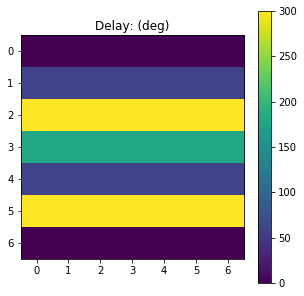

In [41]:
alpha = np.linspace(45*degrees, 45*degrees, 7)
delay = np.linspace(0, 360*degrees, 7)
Alpha, Delay = np.meshgrid(alpha, delay)
print('Initial Alpha',Alpha)
print('Initial Delay',Delay)

S = Stokes("Source 1")
S.general_charac_angles(alpha=Alpha, delay=Delay)
_ = S.parameters.delay(draw=True, verbose=True)

Initial Alpha 0.767944870877505
Initial Delay [0.   0.31 0.63 0.94 1.26 1.57 1.88 2.2  2.51 2.83 3.14 3.46 3.77 4.08
 4.4  4.71 5.03 5.34 5.65 5.97 6.28]
creation delta: [0.   0.31 0.63 0.94 1.26 1.57 1.88 2.2  2.51 2.83 3.14 3.46 3.77 4.08
 4.4  4.71 5.03 5.34 5.65 5.97 0.  ]
delay: [0.   0.31 0.63 0.94 1.26 1.57 1.88 2.2  2.51 2.83 0.   3.46 3.77 4.08
 4.4  4.71 5.03 5.34 5.65 5.97 0.  ]
The delay of Source 1 is (deg):
[  0.  18.  36.  54.  72.  90. 108. 126. 144. 162.   0. 198. 216. 234.
 252. 270. 288. 306. 324. 342.   0.]
The mean value is 154.28571428571428 +- 112.9673964162281



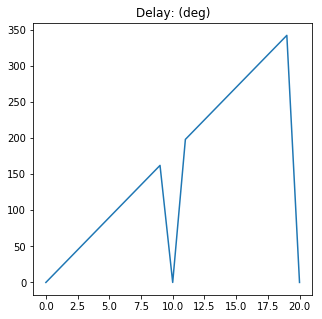

In [44]:
alpha = 44*degrees
delay = np.linspace(0, 360*degrees, 21)
print('Initial Alpha',alpha)
print('Initial Delay',delay)

S = Stokes("Source 1")
S.general_charac_angles(alpha=alpha, delay=delay)
_ = S.parameters.delay(draw=True, verbose=True)

In [6]:
# general_azimuth_ellipticity
S = Stokes()
S.general_azimuth_ellipticity(length=3)
print(S)

N = 5
azimuth = np.random.rand(N) * 180 * degrees
ellipticity = (np.random.rand(N)-0.5) * 90 * degrees
intensity = np.random.rand(5)
degree_pol = np.random.rand(5)
global_phase = np.random.rand(N) * 360 * degrees
S.general_azimuth_ellipticity(azimuth=azimuth, ellipticity=ellipticity, intensity=intensity, degree_pol=degree_pol, global_phase=global_phase)
print(S)
az, el = S.parameters.azimuth_ellipticity()
print(az, el)
print(azimuth, ellipticity)

S = 
[+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+1.000]   [+1.000]   
[+0.000]   [+0.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   

S = 
[+0.748]   [+0.722]   [+0.251]   [+0.556]   [+0.373]   
[+0.259]   [-0.211]   [-0.104]   [+0.046]   [+0.043]   
[-0.082]   [+0.396]   [-0.153]   [+0.109]   [-0.144]   
[+0.355]   [+0.214]   [+0.127]   [+0.072]   [-0.127]   

[2.99 1.03 2.06 0.58 2.5 ] [ 0.46  0.22  0.3   0.27 -0.35]
[2.99 1.03 2.06 0.58 2.5 ] [ 0.46  0.22  0.3   0.27 -0.35]


In [5]:
# from_Jones / from_Stokes
N=100
I = np.random.rand(N) * 10
az = np.random.rand(N) * 180 * degrees
el = (np.random.rand(N) * 90 - 45) * degrees
S = Stokes()
S.general_azimuth_ellipticity(intensity=I, azimuth=az, ellipticity=el)
J = Jones_vector()
J.from_Stokes(S)
S2 = Stokes()
S2.from_Jones(J)
print(S==S2)

S - S S0 = [ 0.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.
  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0.  0.  0.
  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.
  0. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
 -0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0.  0.
  0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
      S1 = [ 0.  0.  0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
 -0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.
 -0.  0. -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0.
  0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0. -0. -0.  0.
 -0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0.  0.
 -0. -0.  0.  0. -0. -0.  0. -0.  0.  0.]
      S2 = [ 0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.
 -0.  0

d:\codigo_ucm\py_pol\py_pol\stokes.py:2012: RuntimeWarning: invalid value encountered in sqrt
  DD = np.sqrt(1 - DOP**2)
d:\codigo_ucm\py_pol\py_pol\jones_vector.py:1199: RuntimeWarning: invalid value encountered in greater
  if np.any(DOP > tol_default):


## Parameters

In [94]:
# Components
S = Stokes()
N = 5
azimuth = np.random.rand(N) * 180 * degrees
ellipticity = (np.random.rand(N)-0.5) * 90 * degrees
azimuth[-1] = np.nan
intensity = np.random.rand(5)
degree_pol = np.random.rand(5)
global_phase = np.random.rand(N) * 360 * degrees
S.general_azimuth_ellipticity(azimuth=azimuth, ellipticity=ellipticity, intensity=intensity, 
                              degree_pol=degree_pol, global_phase=global_phase)
print(S)
az, el = S.parameters.azimuth_ellipticity()
print(az, el)
print(azimuth, ellipticity)

S = 
[+0.580]   [+0.601]   [+0.712]   [+0.453]   [+0.555]   
[+0.171]   [-0.361]   [-0.078]   [+0.078]   [+0.000]   
[+0.346]   [+0.078]   [+0.149]   [-0.038]   [+0.000]   
[-0.089]   [-0.215]   [+0.554]   [+0.026]   [+0.000]   

[0.56 1.46 1.03 2.91  nan] [-0.11 -0.26  0.64  0.14   nan]
[0.56 1.46 1.03 2.91  nan] [-0.11 -0.26  0.64  0.14  0.67]


In [11]:
# Polarized unpolarized
S1 = Stokes('S1')
M1 = np.array([1, 1, 0, 0])
S1.from_matrix(M1)
print(S1.parameters.polarized_unpolarized())

(1.0, 1, 0, 0)
(0.0, 0, 0, 0)
(Polarized S1 = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   
, Unpolarized S1 = 
[+0.000]   
[+0.000]   
[+0.000]   
[+0.000]   
)


The intensity of S is (a.u.):
[[0.3  0.05 0.24 ... 0.67 0.11 0.65]
 [0.91 0.1  0.85 ... 0.19 0.77 0.94]
 [0.41 0.93 0.56 ... 0.76 0.31 0.13]
 ...
 [0.32 0.65 0.08 ... 0.68 0.19 0.89]
 [0.91 0.98 0.03 ... 0.41 0.47 0.34]
 [0.84 0.02 0.81 ... 0.9  0.26 0.86]]
The mean value is 0.495290613147764 +- 0.2888025732260311

alpha: self = [100, 100]; az = (100, 100)
alpha: alpha = (100, 100);
The elctric field amplitudes of S are (V/m):
  Ex (V/m)
[[0.16 0.04 0.04 ... 0.03 0.01 0.43]
 [0.12 0.01 0.33 ... 0.08 0.28 0.37]
 [0.   0.22 0.01 ... 0.35 0.06 0.  ]
 ...
 [0.01 0.09 0.02 ... 0.27 0.01 0.17]
 [0.15 0.8  0.   ... 0.   0.33 0.06]
 [0.14 0.   0.06 ... 0.2  0.04 0.05]]
  Ey (V/m)
[[0.09 0.   0.01 ... 0.04 0.02 0.11]
 [0.19 0.01 0.3  ... 0.09 0.59 0.56]
 [0.18 0.05 0.03 ... 0.33 0.02 0.04]
 ...
 [0.07 0.23 0.01 ... 0.15 0.01 0.25]
 [0.28 0.32 0.   ... 0.06 0.21 0.27]
 [0.17 0.01 0.29 ... 0.16 0.04 0.07]]
  Eu (V/m)
[[0.34 0.04 0.45 ... 0.79 0.29 0.46]
 [0.83 0.29 0.64 ... 0.26 0.36 0.51]
 [0.49

{'intensity': array([[0.3 , 0.05, 0.24, ..., 0.67, 0.11, 0.65],
        [0.91, 0.1 , 0.85, ..., 0.19, 0.77, 0.94],
        [0.41, 0.93, 0.56, ..., 0.76, 0.31, 0.13],
        ...,
        [0.32, 0.65, 0.08, ..., 0.68, 0.19, 0.89],
        [0.91, 0.98, 0.03, ..., 0.41, 0.47, 0.34],
        [0.84, 0.02, 0.81, ..., 0.9 , 0.26, 0.86]]),
 'E0x': array([[0.16, 0.04, 0.04, ..., 0.03, 0.01, 0.43],
        [0.12, 0.01, 0.33, ..., 0.08, 0.28, 0.37],
        [0.  , 0.22, 0.01, ..., 0.35, 0.06, 0.  ],
        ...,
        [0.01, 0.09, 0.02, ..., 0.27, 0.01, 0.17],
        [0.15, 0.8 , 0.  , ..., 0.  , 0.33, 0.06],
        [0.14, 0.  , 0.06, ..., 0.2 , 0.04, 0.05]]),
 'E0y': array([[0.09, 0.  , 0.01, ..., 0.04, 0.02, 0.11],
        [0.19, 0.01, 0.3 , ..., 0.09, 0.59, 0.56],
        [0.18, 0.05, 0.03, ..., 0.33, 0.02, 0.04],
        ...,
        [0.07, 0.23, 0.01, ..., 0.15, 0.01, 0.25],
        [0.28, 0.32, 0.  , ..., 0.06, 0.21, 0.27],
        [0.17, 0.01, 0.29, ..., 0.16, 0.04, 0.07]]),
 'E0u': ar

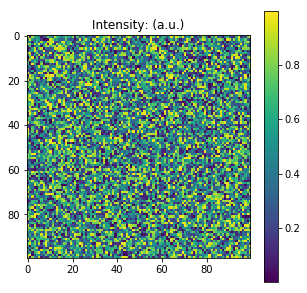

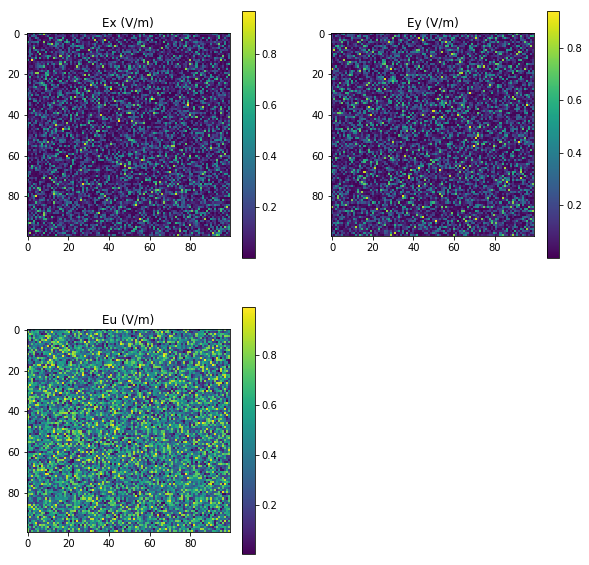

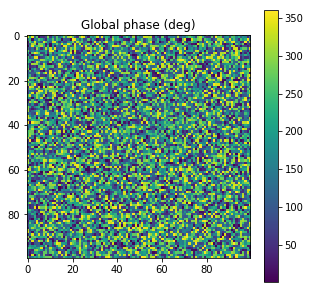

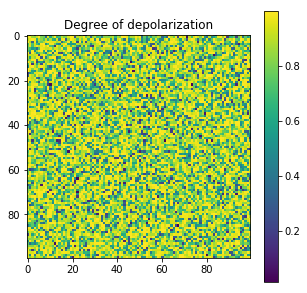

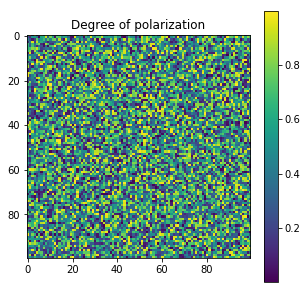

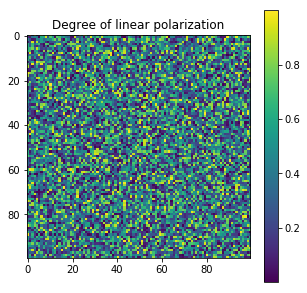

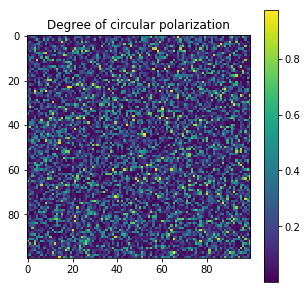

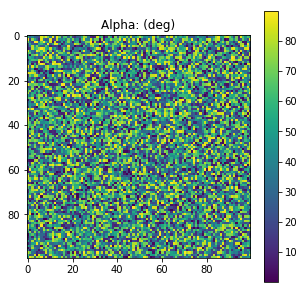

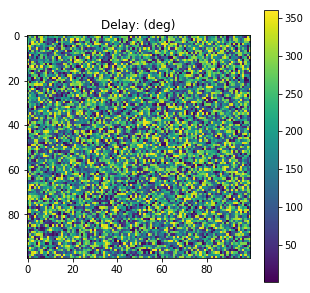

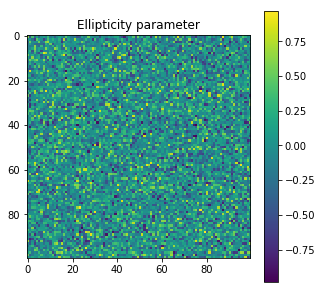

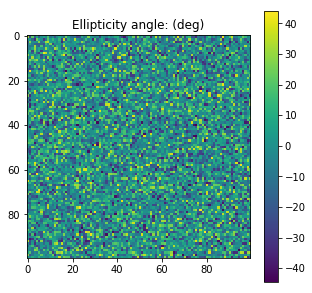

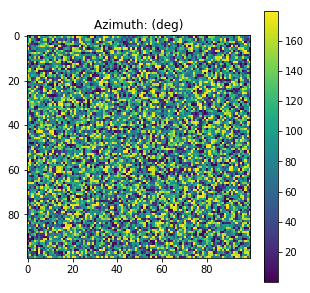

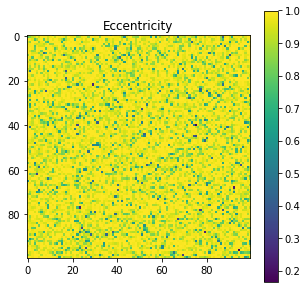

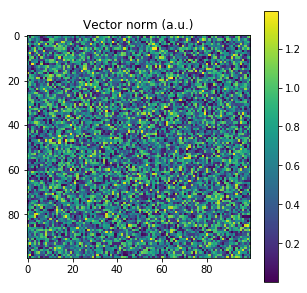

In [38]:
# All
S = Stokes()
N = 100
alpha = np.random.rand(N, N) * 90 * degrees
delta = np.random.rand(N, N) * 360 * degrees
intensity = np.random.rand(N, N)
degree_pol = np.random.rand(N, N)
global_phase = np.random.rand(N, N) * 360 * degrees
S.general_charac_angles(alpha=alpha, delay=delta, intensity=intensity, degree_pol=degree_pol, global_phase=global_phase)
S.parameters.get_all(verbose=True, draw=True)

## Checks

S is physically realizable:
8
4 2
The mean value of param Physicall (cond. 1, S0) is 1.0 +- 0.0
The mean value of param Physicall (cond. 1, S1) is 1.0 +- 0.0
The mean value of param Physicall (cond. 1, S2) is 1.0 +- 0.0
The mean value of param Physicall (cond. 1, S3) is 1.0 +- 0.0
The mean value of param Physicall (cond. 1) is 1.0 +- 0.0
The mean value of param Physicall (cond. 2) is 1.0 +- 0.0
The mean value of param Physicall (cond. 3) is 1.0 +- 0.0
The mean value of param Physicall is 1.0 +- 0.0

{'cond1': array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True, 

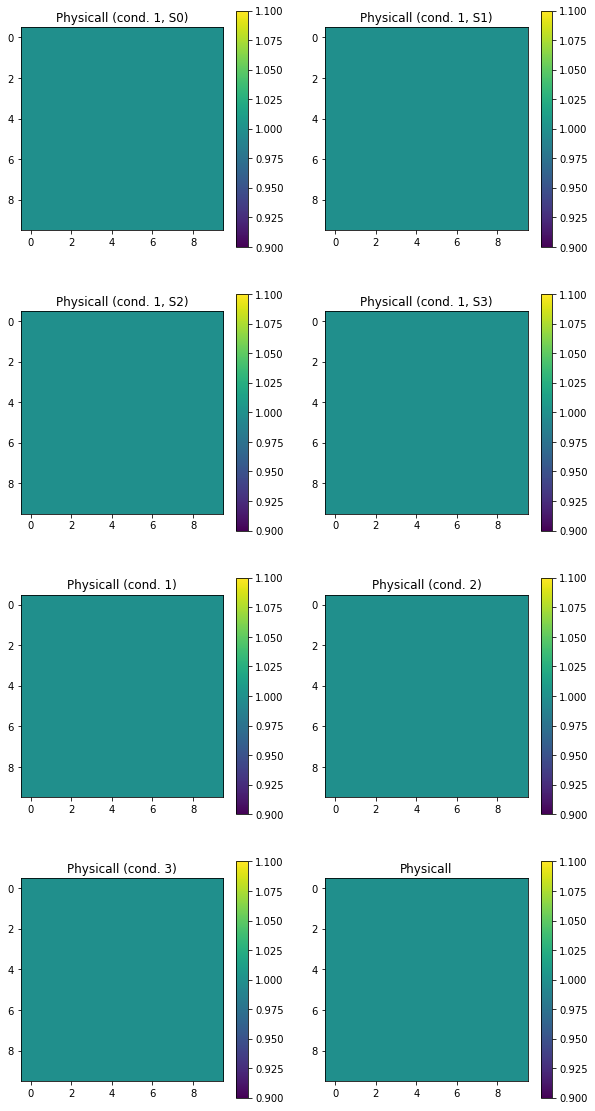

In [11]:
# is_physicall
S = Stokes()
N = 10
azimuth = np.random.rand(N, N) * 180 * degrees
ellipticity = (np.random.rand(N, N)-0.5) * 90 * degrees
azimuth[-1] = np.nan
intensity = np.random.rand(N, N)
degree_pol = np.random.rand(N, N)
global_phase = np.random.rand(N, N) * 360 * degrees
S.general_azimuth_ellipticity(azimuth=azimuth, ellipticity=ellipticity, intensity=intensity, 
                              degree_pol=degree_pol, global_phase=global_phase)
cond, dic = S.checks.is_physical(draw=True, give_all=True)
print(dic)

S is physically realizable:
  Physicall (cond. 1, S0)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
  Physicall (cond. 1, S1)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
  Physicall (cond. 1, S2)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
  Physicall (cond. 1, S3)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  Tr

d:\codigo\py_pol\py_pol\utils.py:662: RuntimeWarning: invalid value encountered in less
  # Check linear polarization case
d:\codigo\py_pol\py_pol\utils.py:667: RuntimeWarning: invalid value encountered in less
  # Check circular polarization case
d:\codigo\py_pol\py_pol\utils.py:668: RuntimeWarning: invalid value encountered in less
  cond2 = (~cond1) * ((np.abs(ellipticity + np.pi / 4) < tol_default**2) +
d:\codigo\py_pol\py_pol\utils.py:674: RuntimeWarning: invalid value encountered in arccos
  alpha[cond3] = 0.5 * np.arccos(
d:\codigo\py_pol\py_pol\utils.py:677: RuntimeWarning: invalid value encountered in sign
  cond4 = cond3 * ((azimuth == 0) + (azimuth == np.pi))
d:\codigo\py_pol\py_pol\utils.py:861: RuntimeWarning: invalid value encountered in greater
  q = q - 1.5 * (angle == -np.pi / 4)
d:\codigo\py_pol\py_pol\utils.py:861: RuntimeWarning: invalid value encountered in less
  q = q - 1.5 * (angle == -np.pi / 4)
d:\codigo\py_pol\py_pol\utils.py:862: RuntimeWarning: invalid valu

The mean value is 0.5006 +- 0.4999996399998704

S is polarized:
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False False False ... False False False]]
The mean value is 0.99 +- 0.099498743710662

S is totally polarized:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
The mean value is 0.0 +- 0.0

S is depolarized:
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
The mean value is 1.0 +- 0.

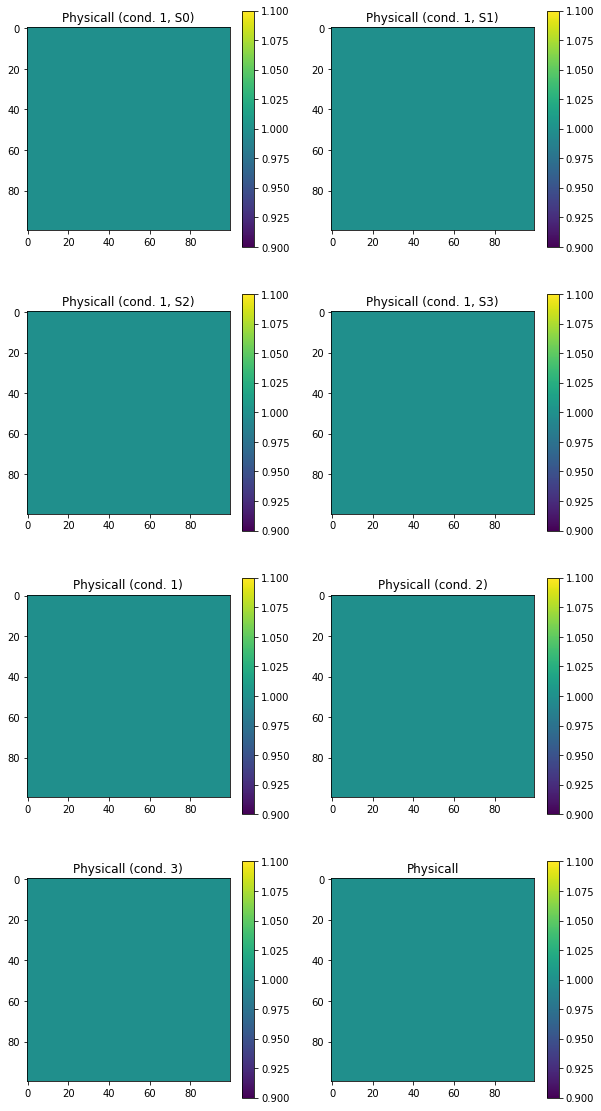

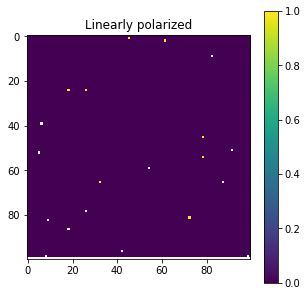

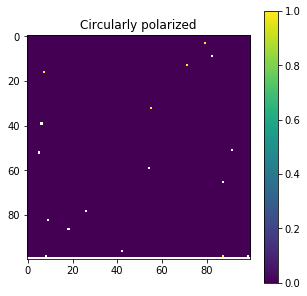

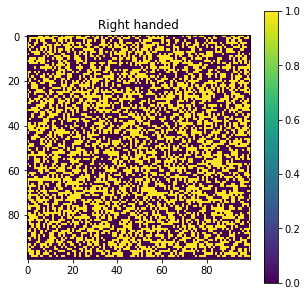

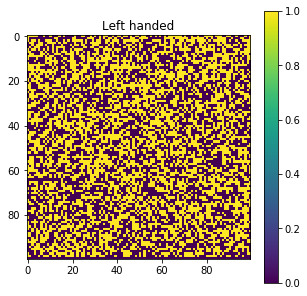

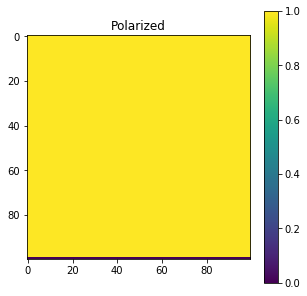

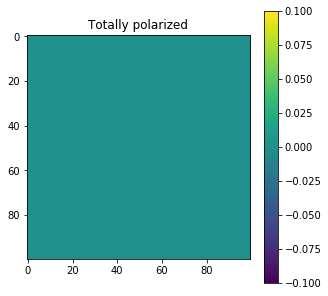

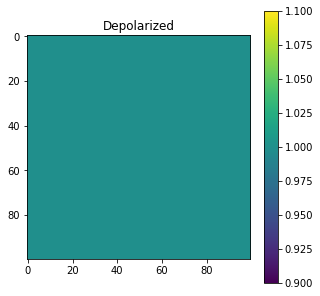

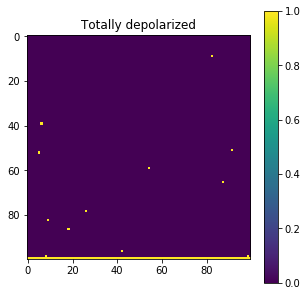

In [21]:
S = Stokes()
N = 100
azimuth = np.random.rand(N, N) * 180 * degrees
ellipticity = (np.random.rand(N, N)-0.5) * 90 * degrees
azimuth[-1] = np.nan
intensity = np.random.rand(N, N)
degree_pol = np.random.rand(N, N)
global_phase = np.random.rand(N, N) * 360 * degrees
S.general_azimuth_ellipticity(azimuth=azimuth, ellipticity=ellipticity, intensity=intensity, 
                              degree_pol=degree_pol, global_phase=global_phase)
print(S.checks)

## Analysis

The intensity components of S are (a.u.):
The mean value of param S0: (a.u.) is 0.00732585921943348 +- 0.5738362768435609
The mean value of param S1: (a.u.) is 0.0027023689183885134 +- 0.5739687445423055
The mean value of param S2: (a.u.) is -0.005823076875152242 +- 0.5746678283318901
The mean value of param S3: (a.u.) is -0.0049241252611408595 +- 0.5749055580103019

The intensity components of S are (a.u.):
The mean value of param S0: (a.u.) is 0.49685465973314374 +- 0.2871884188759093
The mean value of param S1: (a.u.) is 0.0028284346855875007 +- 0.3124980599821453
The mean value of param S2: (a.u.) is -0.0026970426675723886 +- 0.31421133842167015
The mean value of param S3: (a.u.) is -0.00020758641499460105 +- 0.3132756040500792

S is physically realizable:
The mean value is 1.0 +- 0.0



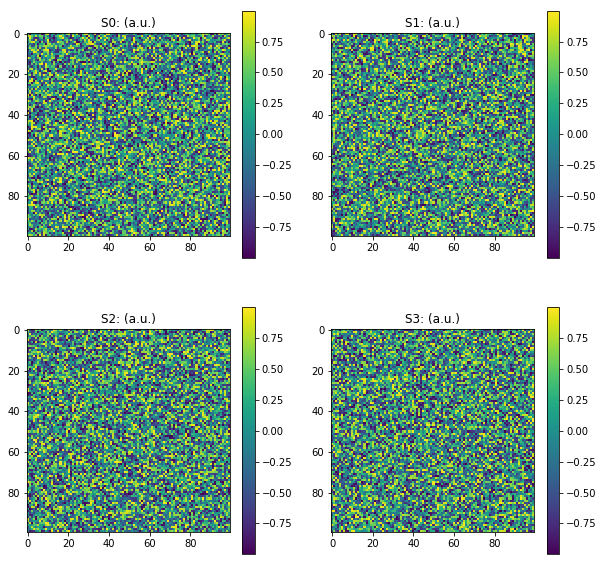

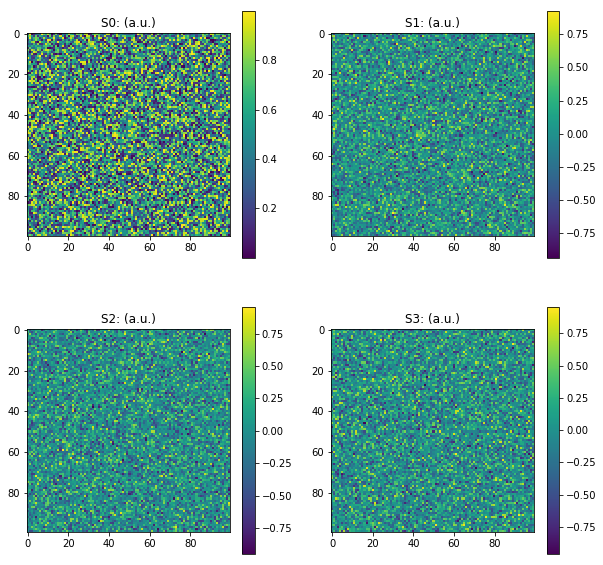

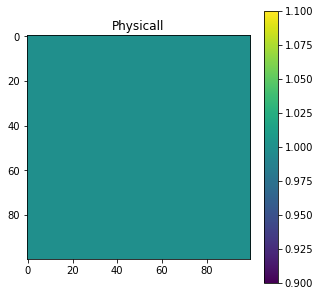

In [25]:
M = (np.random.rand(100, 100, 4) - 0.5) * 2
S = Stokes()
S.from_matrix(M)
_ = S.parameters.components(draw=True)

S.analysis.filter_physical_conditions()
_ = S.parameters.components(draw=True)
_ = S.checks.is_physical(draw=True)

In [18]:
a = np.zeros(5)
a[0] = False
print(a)

[0. 0. 0. 0. 0.]


In [23]:
if np.nan < 5:
    print('Si')
else:
    print('No')

No
